
## These are some visualised view of the spotify data.


In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [58]:
df_song = pd.read_csv('fs_by_song.csv')
df_artist = pd.read_csv('fs_by_artists.csv')
df_genres = pd.read_csv('fs_by_genres.csv')
df_year = pd.read_csv('fs_by_year.csv')
df_extend_genre = pd.read_csv('fs_by_extended_genre.csv')

### Created label encoders and replaced them with the label encdoded column, as there are some textual columns in each csv file which cannot be processed accurately in algorithms.

In [59]:
def generate_label_encoder(df, column): 
    label_encoder = LabelEncoder()
    le = label_encoder.fit(df[column])
    return le

def replace_with_label_encoder(df, le, column):
    transformed_data = le.transform(df[column])
    label_encoded_reshaped = np.reshape(transformed_data, (transformed_data.shape[0], 1))
    df[column] = label_encoded_reshaped
    return df

def replace_with_original_column(df, le, column):
    df[column] = le.inverse_transform(df[column])
    return df


### To visualise the clusters properly, for different csv files and their features, I have used Kmeans.

In [60]:
def get_kmeans(df, n_clusters, score_metric ='euclidean'):
    model = KMeans(n_clusters)
    model.fit(df)
    clust_labels = model.predict(df)
    cent = model.cluster_centers_
    return (clust_labels, cent)


### Visualising artists and popularity cluster. The graph seems a a bit difficult to comprehend, and no pattern is noticed.

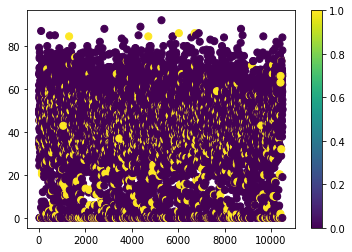

In [61]:
le = generate_label_encoder(df_artist, 'artists' )
df = replace_with_label_encoder(df_artist, le, 'artists')

ss = StandardScaler()
ss.fit_transform(df)

clust_labels, cent = get_kmeans(df, 2)
kmeans = pd.DataFrame(clust_labels)
df.insert((df.shape[1]),'kmeans',kmeans)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['artists'],df['popularity'], c=kmeans[0],s=50)
plt.colorbar(scatter)

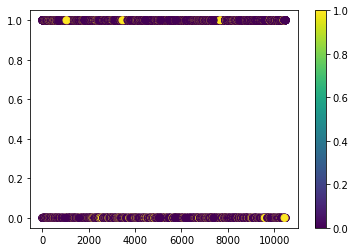

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['artists'],df['mode'], c=kmeans[0],s=50)
plt.colorbar(scatter)

dataframe with genres label encoded:       mode  genres  acousticness  danceability   duration_ms    energy  instrumentalness  liveness   loudness  speechiness       tempo   valence  popularity
0        1       0      0.979333      0.162883  1.602977e+05  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500  0.103783   27.833333
1        1       1      0.494780      0.299333  1.048887e+06  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667  0.221750   52.500000
2        1       2      0.762000      0.712000  1.151770e+05  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000  0.975000   48.000000
3        1       3      0.676557      0.538961  1.906285e+05  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362  0.448249   45.820071
4        1       4      0.459210      0.516167  3.431965e+05  0.442417          0.849667  0.118067 -15.472083     0.046517  127.885750  0.307325   43.500000
...    ...     ...   

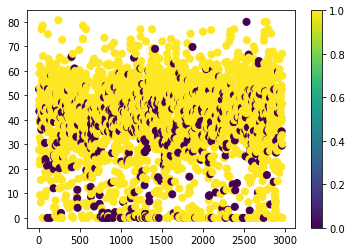

In [63]:
le_genre = generate_label_encoder(df_genres, 'genres' )
df_gen = replace_with_label_encoder(df_genres, le_genre, 'genres')

print('dataframe with genres label encoded:',df_gen)
ss = StandardScaler()
ss.fit_transform(df_gen)

clust_labels, cent = get_kmeans(df_gen, 2)
kmeans = pd.DataFrame(clust_labels)
df_gen.insert((df_gen.shape[1]),'kmeans',kmeans)

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_gen['genres'],df_gen['popularity'], c=kmeans[0],s=50)
plt.colorbar(scatter)

In [64]:
import plotly.express as px
fig = px.line(df_gen, x="genres", y="popularity", title='Genre vs popularity')
fig.show()

### Visualised popularity wise genre, and took the top 30 of them. 

In [65]:
df_original_gen = replace_with_original_column(df_gen, le_genre,'genres')
df_pie_gen = df_original_gen.sort_values('popularity',ascending = False).head(30)
print(df_pie_gen)
fig = px.pie(df_pie_gen, values='popularity', names='genres', title='Top Popular Genres')
fig.show()

      mode               genres  acousticness  danceability  duration_ms    energy  instrumentalness  liveness   loudness  speechiness       tempo   valence  popularity  kmeans
236      1             basshall      0.213167      0.818000  169799.1667  0.630167      2.000000e-05  0.081067  -6.627833     0.134833  115.092500  0.588667   80.666667       1
2532     1  south african house      0.043833      0.847000  311854.3333  0.562333      1.303392e-01  0.075133  -7.719000     0.050733  123.676333  0.834333   80.000000       0
2754     1      trap venezolano      0.044600      0.877000  231848.0000  0.777000      3.460000e-05  0.086300  -4.246000     0.117000  102.020000  0.706000   80.000000       1
2777     0          turkish edm      0.008290      0.698000  186700.0000  0.719000      4.010000e-06  0.326000  -4.923000     0.045500  120.062000  0.364000   80.000000       1
535      0   chinese electropop      0.002570      0.660000  217088.0000  0.787000      0.000000e+00  0.323000  -4.